In [2]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

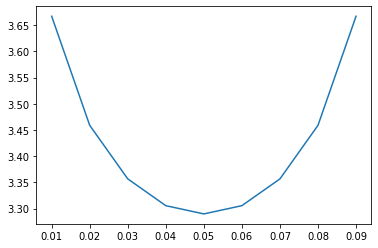

In [5]:
#8.1(a)
alpha = 0.1
beta = np.arange(0,alpha,0.01)
y1 = scipy.stats.norm.ppf(1-alpha+beta)
y2 = scipy.stats.norm.ppf(beta)
plt.plot(beta,y1-y2)

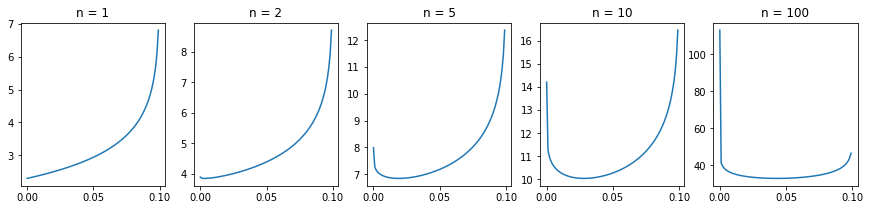

In [6]:
#8.1(b)
alpha = 0.1
N = [1,2,5,10,100]
figure, axis = plt.subplots(1,5,figsize=(15,3))
for i in range(len(N)):
    n = N[i]
    beta = np.arange(0,alpha,0.001)
    y1 = scipy.stats.gamma.ppf(1-alpha+beta,n)
    y2 = scipy.stats.gamma.ppf(beta,n)
    axis[i].plot(beta,y1-y2)
    axis[i].set_title('n = '+str(n))

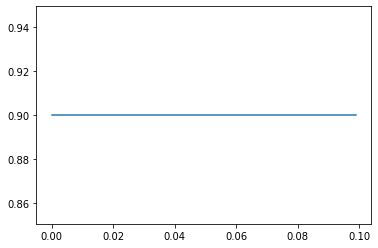

In [7]:
#8.1(c)
alpha = 0.1
beta = np.arange(0,alpha,0.001)
y1 = scipy.stats.uniform.ppf(1-alpha+beta)
y2 = scipy.stats.uniform.ppf(beta)
plt.plot(beta,y1-y2)

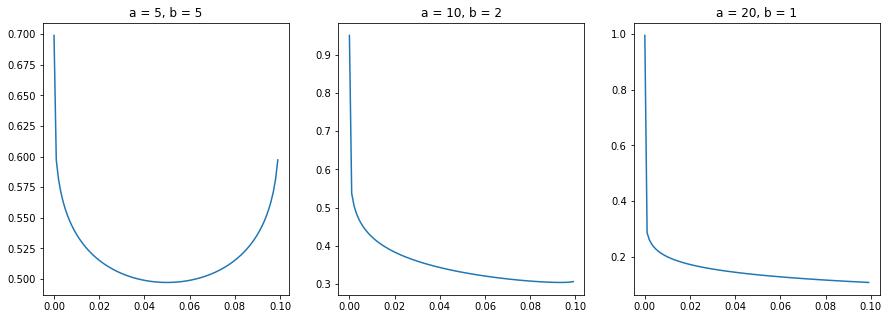

In [8]:
#8.1(c)
alpha = 0.1
A = [5,10,20]
B = [5,2,1]
figure, axis = plt.subplots(1,3,figsize=(15,5))
for i in range(len(A)):
    a = A[i]
    b = B[i]
    beta = np.arange(0,alpha,0.001)
    y1 = scipy.stats.beta.ppf(1-alpha+beta,a,b)
    y2 = scipy.stats.beta.ppf(beta,a,b)
    axis[i].plot(beta,y1-y2)
    axis[i].set_title('a = '+str(a)+', b = '+str(b))
plt.show()

In [7]:
#8.2(a,b)
teta = 1
N = [20,50,100]
k = 1000
alpha = 0.1
for i in range(len(N)):
    n = N[i]
    y = np.array([scipy.stats.uniform.rvs(scale=teta,size=n) for t in range(k)])
    
    x = 2 * y.mean(axis=1)
    D = x / np.sqrt(12)
    asymp_list = [[x[j] + scipy.stats.norm.ppf(alpha/2)*x[j]/np.sqrt(n*3), 
                   x[j] + scipy.stats.norm.ppf(1-alpha/2)*x[j]/np.sqrt(n*3)] for j in range(k)]
    c = 0
    for j in range(k):
        if asymp_list[j][0] < teta < asymp_list[j][1]:
            c += 1
    print('Для n =',n,'эмпирическая вероятность для асимптотического интервала есть',round(float(c)/k,3))
    
    y = y.max(axis=1)
    accur_list = [[y[j]/(1)**(1/n), y[j]/(alpha)**(1/n)] for j in range(k)]
    c = 0
    for j in range(k):
        if accur_list[j][0] < teta < accur_list[j][1]:
            c += 1
    print('Для n =',n,'эмпирическая вероятность для точного интервала есть',round(c/k,3))
    
    mean_length_asymp = np.array([asymp_list[j][1] - asymp_list[j][0] for j in range(k)])
    mean_length_asymp =  mean_length_asymp.mean()
    mean_length_accur = np.array([accur_list[j][1] - accur_list[j][0] for j in range(k)])
    mean_length_accur =  mean_length_accur.mean()
    print('Средняя длина асимптотического интервала:',round(mean_length_asymp,3))
    print('Средняя длина точного интервала:',round(mean_length_accur,3),'\n')

Для n = 20 эмпирическая вероятность для асимптотического интервала есть 0.901
Для n = 20 эмпирическая вероятность для точного интервала есть 0.898
Средняя длина асимптотического интервала: 0.425
Средняя длина точного интервала: 0.116 

Для n = 50 эмпирическая вероятность для асимптотического интервала есть 0.9
Для n = 50 эмпирическая вероятность для точного интервала есть 0.903
Средняя длина асимптотического интервала: 0.269
Средняя длина точного интервала: 0.046 

Для n = 100 эмпирическая вероятность для асимптотического интервала есть 0.896
Для n = 100 эмпирическая вероятность для точного интервала есть 0.901
Средняя длина асимптотического интервала: 0.19
Средняя длина точного интервала: 0.023 



In [14]:
#8.3
teta_list = [0.1,0.4,0.5,0.9]
alpha = 0.1
n_list = [20,50,100]
k = 1000
for i in range(len(teta_list)):
    for j in range(len(n_list)):
        n = n_list[j]
        teta = teta_list[i]
        x = np.array([scipy.stats.bernoulli.rvs(teta,size=n) for l in range(k)])
        x = x.mean(axis=1)
        z1 = scipy.stats.norm.ppf(alpha/2)
        z2 = scipy.stats.norm.ppf(1 - alpha/2)
        int1 = np.array([-(x[l] + z1 * np.sqrt(x[l] * (1-x[l])) / np.sqrt(n)) +
                 x[l] + z2 * np.sqrt(x[l] * (1-x[l])) / np.sqrt(n) for l in range(k)])
        int2 = np.array([-(math.sin((2 * math.asin(math.sqrt(x[l])) - z2 / np.sqrt(n))/2)**2) +
                 math.sin((2 * math.asin(math.sqrt(x[l])) - z1 / np.sqrt(n))/2)**2 for l in range(k)])
        mean1 = int1.mean()
        mean2 = int2.mean()
        print('teta =',teta,' n =',n,'   len_1 =',round(mean1,5),' len_2 =',round(mean2,5))
    print('\n')

teta = 0.1  n = 20    len_1 = 0.19509  len_2 = 0.19072
teta = 0.1  n = 50    len_1 = 0.13549  len_2 = 0.13427
teta = 0.1  n = 100    len_1 = 0.0973  len_2 = 0.09687


teta = 0.4  n = 20    len_1 = 0.35095  len_2 = 0.34309
teta = 0.4  n = 50    len_1 = 0.22522  len_2 = 0.22319
teta = 0.4  n = 100    len_1 = 0.16042  len_2 = 0.1597


teta = 0.5  n = 20    len_1 = 0.35871  len_2 = 0.35067
teta = 0.5  n = 50    len_1 = 0.23025  len_2 = 0.22818
teta = 0.5  n = 100    len_1 = 0.16368  len_2 = 0.16294


teta = 0.9  n = 20    len_1 = 0.19666  len_2 = 0.19226
teta = 0.9  n = 50    len_1 = 0.13589  len_2 = 0.13467
teta = 0.9  n = 100    len_1 = 0.09705  len_2 = 0.09661


